<a href="https://colab.research.google.com/github/NagarajaN-Nethi/VGG-16/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ns560808","key":"d95d1331c87ea8c01dcea9797f454928"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:29<00:00, 42.3MB/s]
100% 2.29G/2.29G [00:29<00:00, 82.7MB/s]


In [ ]:
!mkdir data
!unzip chest-xray-pneumonia.zip -d data

In [37]:
#Importing Libraries
from keras.layers import Lambda, Dense, Flatten, Input, Dropout, BatchNormalization
from keras.models import Model,  Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [7]:
#Image size
image_size = [224, 224]

In [11]:
#data path

training_path = '/content/data/chest_xray/train'
testing_path = '/content/data/chest_xray/test'


In [12]:
train_datagen = ImageDataGenerator(rescale = 1. /255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
training_set = train_datagen.flow_from_directory(training_path,
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1. /255)

In [15]:
test_set = train_datagen.flow_from_directory(testing_path,
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [16]:
# add preprocessing layer to start VGG
vgg = VGG16(input_shape = image_size + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [17]:
for layer in vgg.layers:
  layer.trainable = False

In [18]:
folders = glob('/content/data/chest_xray/train/*')

In [19]:
folders

['/content/data/chest_xray/train/NORMAL',
 '/content/data/chest_xray/train/PNEUMONIA']

In [30]:
#Initializing with the pre trained model
X = Flatten()(vgg.output)
#Defining the output layer
predictions = Dense(len(folders), activation = 'softmax')(X)
#Creating the model
model = Model(inputs = vgg.input, outputs = predictions)
#model summary
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [31]:
#Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))

Epoch 1/5
163/163 [==============================] - 107s 658ms/step - loss: 0.1950 - accuracy: 0.9210 - val_loss: 0.4366 - val_accuracy: 0.8574
Epoch 2/5
163/163 [==============================] - 106s 649ms/step - loss: 0.1021 - accuracy: 0.9601 - val_loss: 0.5047 - val_accuracy: 0.8349
Epoch 3/5
163/163 [==============================] - 107s 656ms/step - loss: 0.0936 - accuracy: 0.9651 - val_loss: 0.4291 - val_accuracy: 0.8702
Epoch 4/5
163/163 [==============================] - 108s 665ms/step - loss: 0.0865 - accuracy: 0.9680 - val_loss: 0.4026 - val_accuracy: 0.8782
Epoch 5/5
163/163 [==============================] - 109s 669ms/step - loss: 0.0755 - accuracy: 0.9726 - val_loss: 0.6765 - val_accuracy: 0.8221


In [33]:
#define plots used in the tensorflow proffesional cerificate on Coursera
#source https://www.coursera.org/professional-certificates/tensorflow-in-practice
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

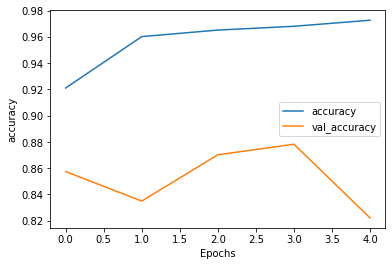

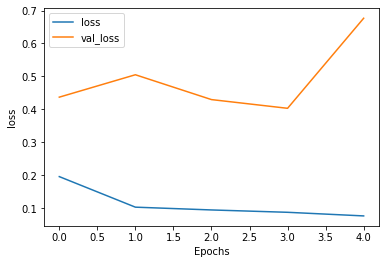

In [34]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Using a Dropout layer to prevent overfit

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

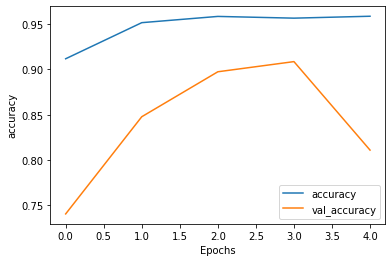

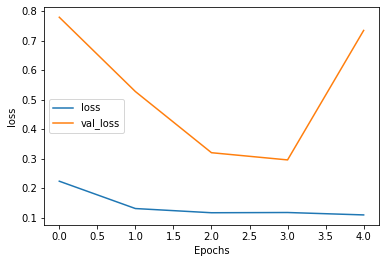

In [35]:
#Initializing with the pre trained model
X = Flatten()(vgg.output)
#Add a dropout layer
X = Dropout(0.5)(X)
#Defining the output layer
predictions = Dense(len(folders), activation = 'softmax')(X)
#Creating the model
model = Model(inputs = vgg.input, outputs = predictions)
#model summary
model.summary()
#Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

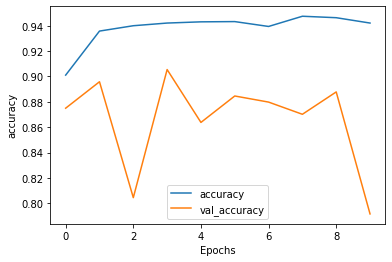

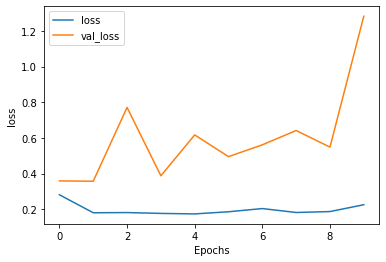

In [36]:
#Initializing with the pre trained model
X = Flatten()(vgg.output)
#Add a dropout layer
X = Dropout(0.5)(X)
X = Dropout(0.5)(X)
#Defining the output layer
predictions = Dense(len(folders), activation = 'softmax')(X)
#Creating the model
model = Model(inputs = vgg.input, outputs = predictions)
#model summary
model.summary()
#Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

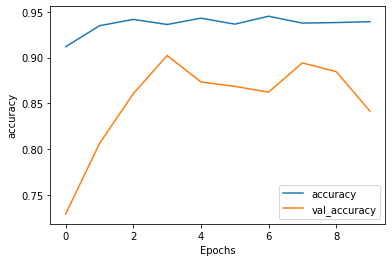

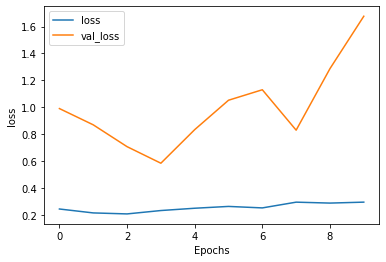

In [38]:
#Initializing with the pre trained model
X = Flatten()(vgg.output)
#Add a dropout layer
X = Dropout(0.5)(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
#Defining the output layer
predictions = Dense(len(folders), activation = 'softmax')(X)
#Creating the model
model = Model(inputs = vgg.input, outputs = predictions)
#model summary
model.summary()
#Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")